In [0]:
import keras

In [0]:
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation,Flatten
from keras.optimizers import RMSprop
import matplotlib.pyplot as plt

In [0]:
batch_size = 64
num_classes = 10
epochs = 5

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [0]:
#x_train = x_train.reshape(50000, 32*32*3)
#x_test = x_test.reshape(10000, 32*32*3)

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [0]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
x_train.shape[1:]

(32, 32, 3)

In [0]:
model = Sequential()

model.add(Dense(128, input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

# model.add(Dense(512))
# model.add(Activation('relu'))
# model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32, 32, 128)       512       
_________________________________________________________________
activation_29 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_22 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
dense_30 (Dense)             (None, 32, 32, 128)       16512     
_________________________________________________________________
activation_30 (Activation)   (None, 32, 32, 128)       0         
_________________________________________________________________
dropout_23 (Dropout)         (None, 32, 32, 128)       0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 131072)            0         
__________

In [0]:
opt= keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
model.compile(loss='categorical_crossentropy',

              optimizer=opt,

              metrics=['accuracy'])
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
mlp = model.fit(x_train, y_train,

                    batch_size=batch_size,

                    epochs=epochs,

                    verbose=1,

                    validation_data=(x_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 48s 962us/step - loss: 1.6317 - acc: 0.4264 - val_loss: 1.5043 - val_acc: 0.4572
Epoch 2/5
50000/50000 [==============================] - 47s 936us/step - loss: 1.4501 - acc: 0.4945 - val_loss: 1.4491 - val_acc: 0.4919
Epoch 3/5
50000/50000 [==============================] - 41s 828us/step - loss: 1.3902 - acc: 0.5160 - val_loss: 1.4207 - val_acc: 0.5052
Epoch 4/5
50000/50000 [==============================] - 28s 565us/step - loss: 1.3327 - acc: 0.5366 - val_loss: 1.4365 - val_acc: 0.4991
Epoch 5/5
50000/50000 [==============================] - 44s 880us/step - loss: 1.2925 - acc: 0.5529 - val_loss: 1.4180 - val_acc: 0.5068


In [0]:
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

10000/10000 [==============================] - 2s 176us/step
Test loss: 1.4180343019485473
Test accuracy: 0.5068


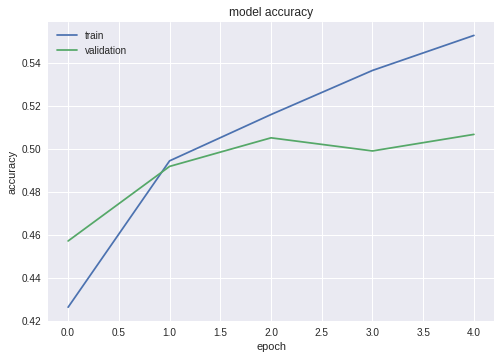

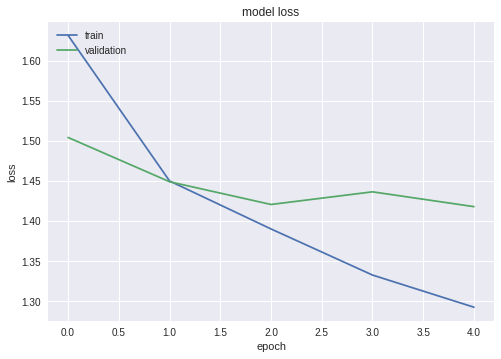

<Figure size 576x396 with 0 Axes>

In [0]:
plt.figure()
plt.plot(mlp.history['acc'])
plt.plot(mlp.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig("Experiment_11.png")
# "Loss"
plt.plot(mlp.history['loss'])
plt.plot(mlp.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.savefig("Experiment_12.png")